# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

# Equipo 10

Integrantes:

*   Diego Fernando Guerra Burgos - A01793499
*   Esteban Sánchez Retamoza - A01740631
*   Hansel Zapiain Rodríguez - A00469031
*   Julio César Ruíz Marks - A01794742
*   Salvador Martínez Morales - A01273366

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2
from google.colab.patches import cv2_imshow

<ipython-input-1-6dd5355f9c95>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gauss
<ipython-input-1-6dd5355f9c95>:8: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as med


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Visión computacional - Actividades/Semana 2"
os.chdir(DIR)

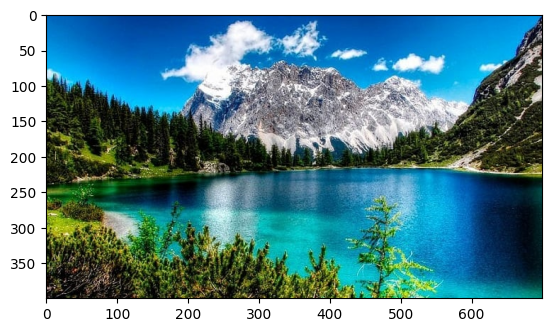

In [ ]:
original_image = Image.open('data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

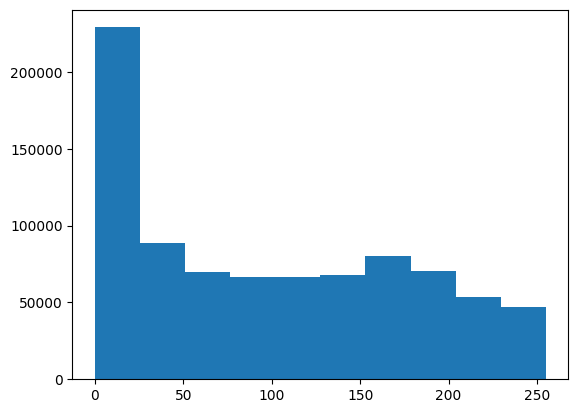

In [ ]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

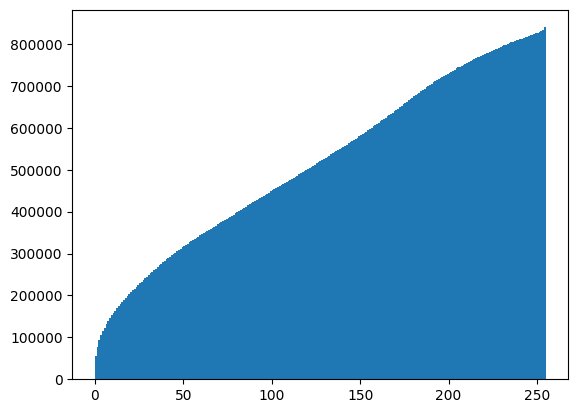

In [ ]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


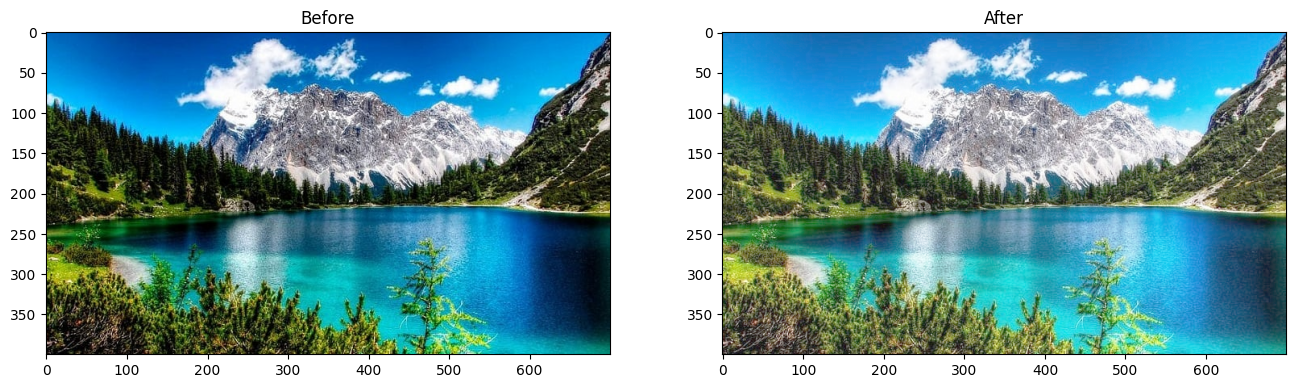

In [ ]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

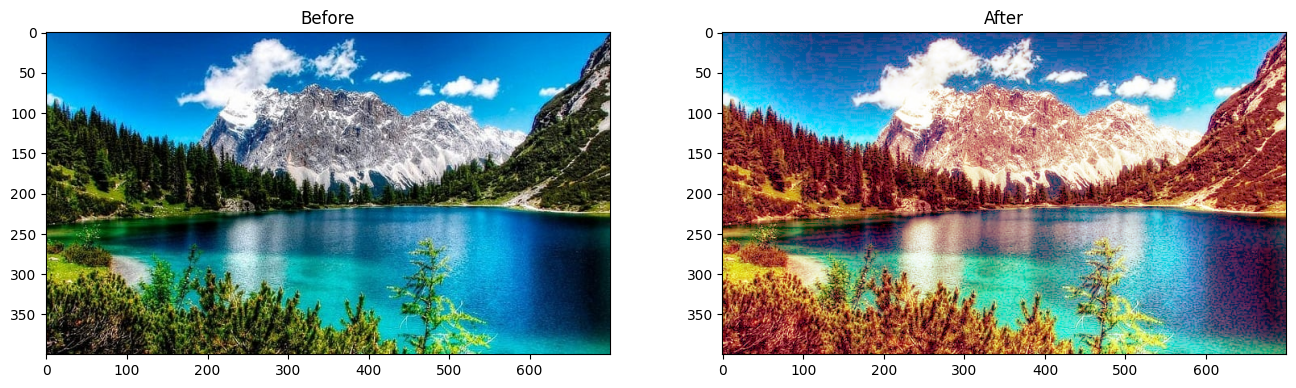

In [ ]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

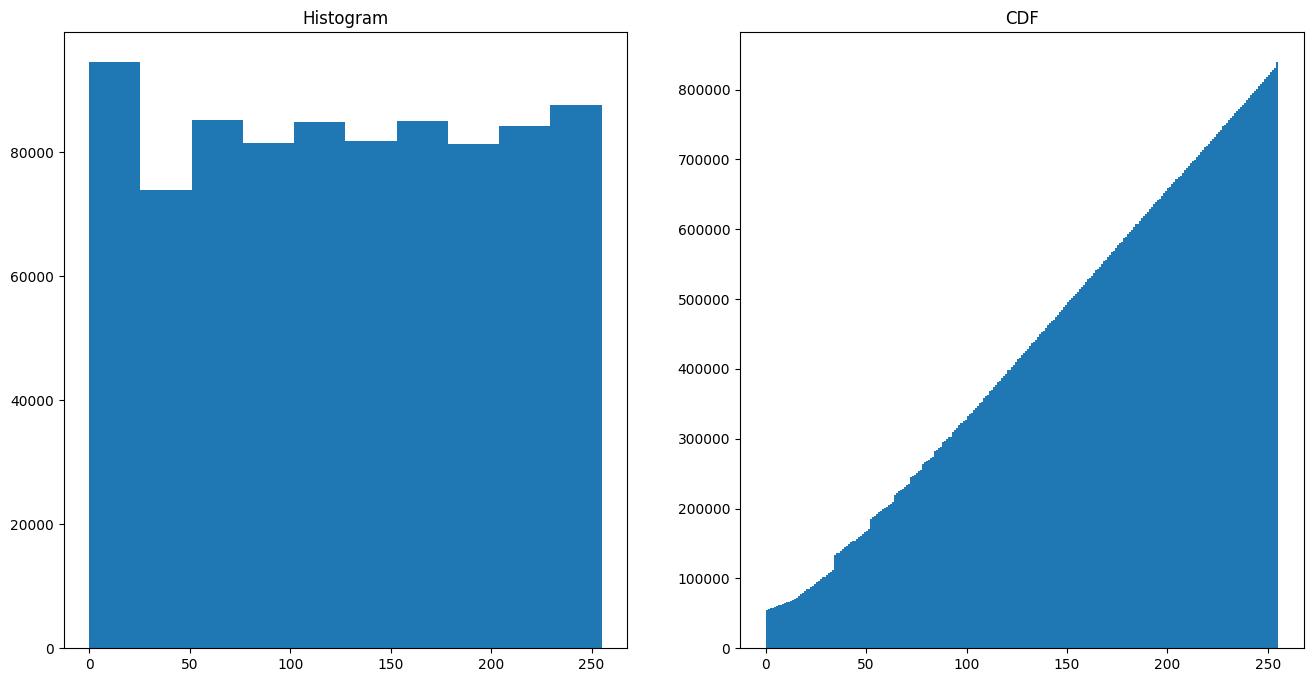

In [ ]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

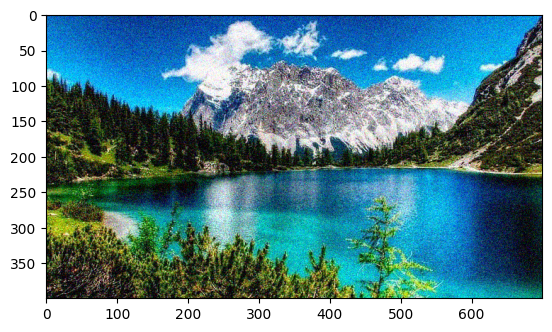

In [ ]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

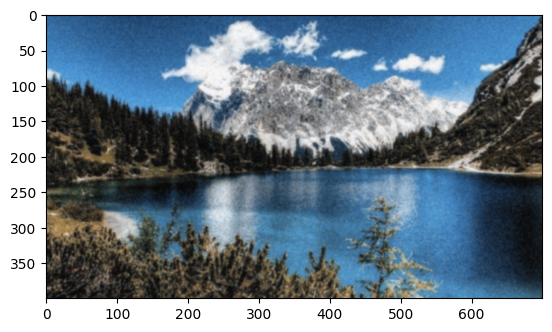

In [ ]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

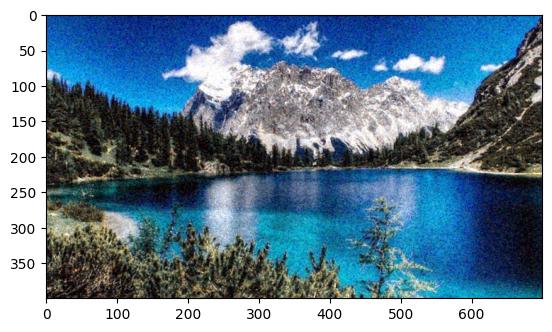

In [ ]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [ ]:
pip install image_slicer

In [ ]:
from image_slicer import slice

n = 4
slice('data/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

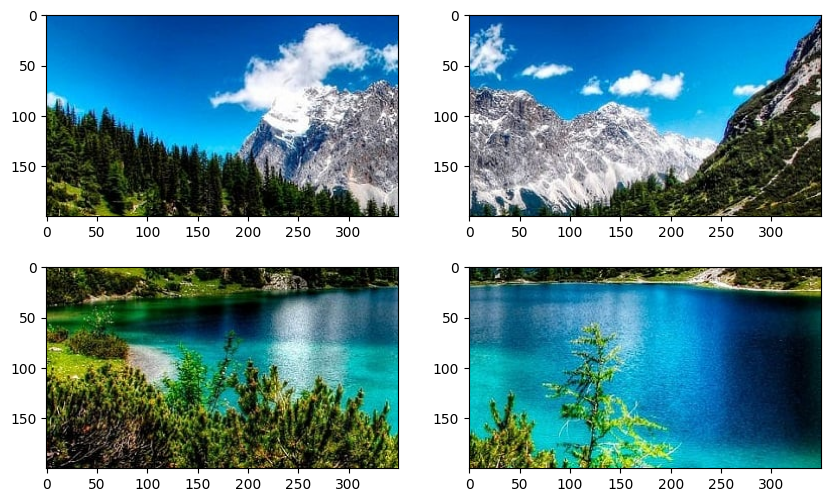

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

## Ejercicio 1 <a class="anchor" id="challenge" ></a>

Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

The key idea of conventional histogram equalization (CHE) is
to redistribute image intensity to a new uniform distribution
and enhance image quality. In order to improve the overall
contrast of an image, CHE modifies the cumulative density
function (CDF) to redistribute the intensity of gray levels
of images. Uniform intensity distribution is attained
when the gray levels with lower-intensity recurrence merge
while increasing the disparity between gray levels with highintensity recurrence. Essentially, HE improves the contrast
of the entire image and makes the image enhancement
approach simple and reliable.

IEEE Xplore Full-Text PDF: (n.d.). https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9642999

Text(0.5, 1.0, 'Tile Histogram 500x500')

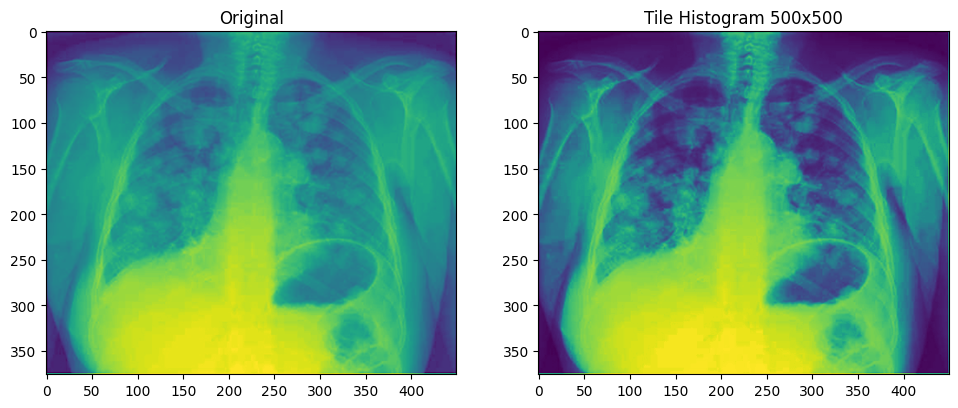

In [ ]:
def tile_histogram(image, tile_size):
  height, width = image.shape[:2]
  result_image = np.zeros_like(image)

  for y in range(0, height, tile_size):
    for x in range(0, width, tile_size):
      tile = image[y:y + tile_size, x:x + tile_size]
      tile_equalized = cv2.equalizeHist(tile)
      result_image[y:y + tile_size, x:x + tile_size] = tile_equalized

    return result_image

image = cv2.imread('data/radiografia.jpg', cv2.IMREAD_GRAYSCALE)

tile_size_1 = 500

result_image_500 = tile_histogram(image, tile_size_1)

fig = plt.figure(figsize=(18, 20))

a=fig.add_subplot(2,3,1)
imgplot = plt.imshow(image)
a.set_title('Original')

a=fig.add_subplot(2,3,2)
imgplot = plt.imshow(result_image_500)
a.set_title('Tile Histogram 500x500')

## Ejercicio 2 <a class="anchor" id="challenge" ></a>

Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

Adaptive histogram equalization (AHE) is a computer image processing technique used to improve contrast in images. It differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

However, AHE has a tendency to overamplify noise in relatively homogeneous regions of an image. A variant of adaptive histogram equalization called contrast limited adaptive histogram equalization (CLAHE) prevents this by limiting the amplification.

Wikipedia contributors. (2022, October 12). Adaptive histogram equalization. Wikipedia. https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

Text(0.5, 1.0, 'Result image (SWAHE)')

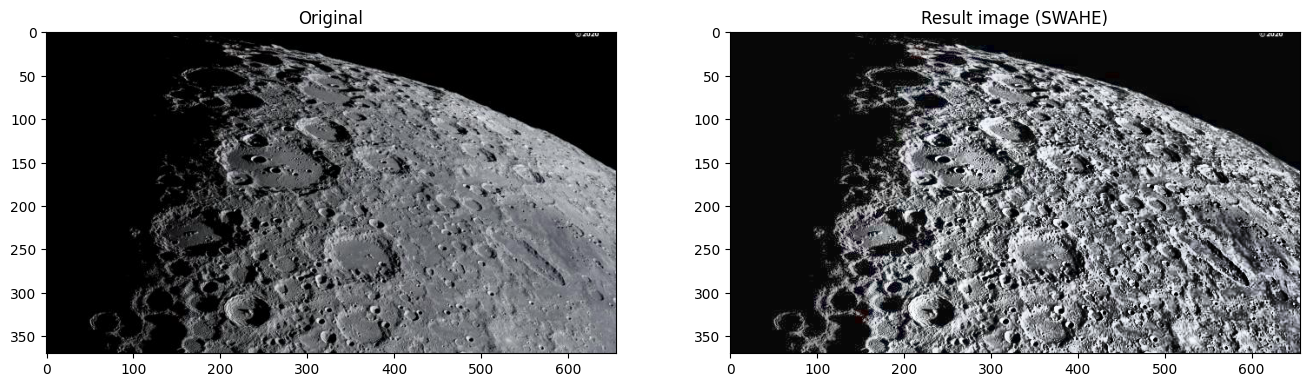

In [ ]:
def sliding_window(image, window_size):
  height, width = image.shape[:2]
  result_image = np.zeros_like(image)

  for y in range(0, height, window_size):
    for x in range(0, width, window_size):
      window = image[y:y + window_size, x:x + window_size]
      window_equalized = exposure.equalize_adapthist(window, clip_limit = 0.03)
      result_image[y:y + window_size, x:x + window_size] = (window_equalized * 255).astype(np.uint8)

    return result_image

image = cv2.imread('data/luna_1.jpeg', cv2.IMREAD_UNCHANGED)

window_size = 400
result_image = sliding_window(image, window_size)

fig = plt.figure(figsize=(25, 25))

a=fig.add_subplot(2,3,1)
imgplot = plt.imshow(image)
a.set_title('Original')

a=fig.add_subplot(2,3,2)
imgplot = plt.imshow(result_image)
a.set_title('Result image (SWAHE)')

## Ejercicio 2 <a class="anchor" id="challenge" ></a>

Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.

Histogram equalization is a basic image processing technique that adjusts the global contrast of an image by updating the image histogram’s pixel intensity distribution. Doing so enables areas of low contrast to obtain higher contrast in the output image.

Essentially, histogram equalization works by:
1.   Computing a histogram of image pixel intensities
2.   Evenly spreading out and distributing the most frequent pixel values (i
e., the ones with the largest counts in the histogram)
3.   Giving a linear trend to the cumulative distribution function (CDF)

The result of applying histogram equalization is an image with higher global contrast.

Rosebrock, A. (2021, April 17). OpenCV Histogram Equalization and Adaptive Histogram Equalization (CLAHE) - PyImageSearch. PyImageSearch. https://pyimagesearch.com/2021/02/01/opencv-histogram-equalization-and-adaptive-histogram-equalization-clahe/

Text(0.5, 1.0, 'Result image (CLAHE)')

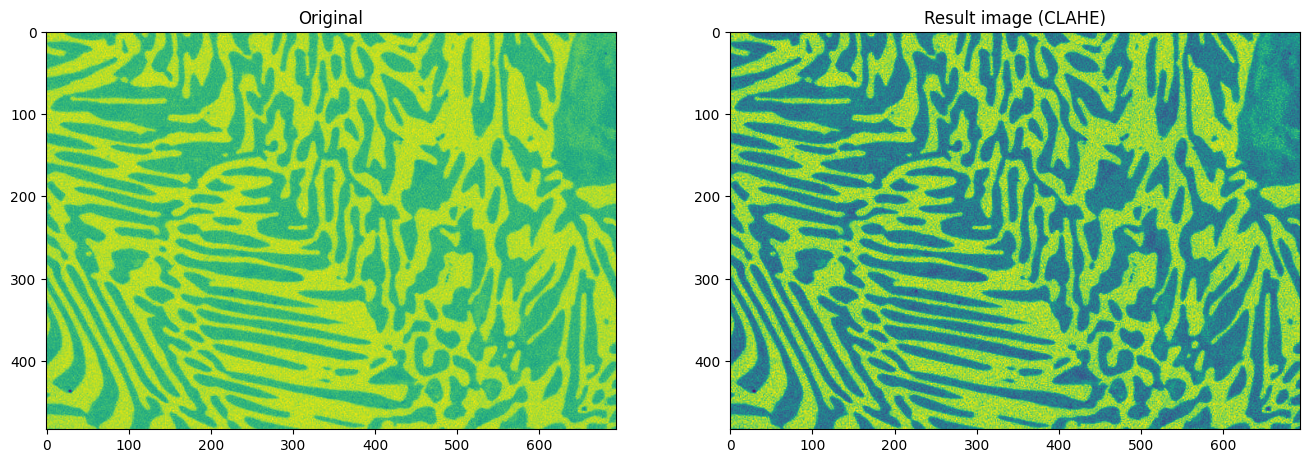

In [ ]:
image = cv2.imread('data/patern_1.jpeg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_result = clahe.apply(image)

fig = plt.figure(figsize=(25, 25))

a=fig.add_subplot(2,3,1)
imgplot = plt.imshow(image)
a.set_title('Original')

a=fig.add_subplot(2,3,2)
imgplot = plt.imshow(clahe_result)
a.set_title('Result image (CLAHE)')